In [23]:
# needed functions and libraries
import pandas as pd
import seaborn as sns
from pathlib import Path
import signature_functions as sf

# inputs

In [24]:
config_path = '/media/kusterlab/internal_projects/active/TOPAS/WP31/Playground/Retrospective_study/2023.07.03_AhS_PANCANCER_COHORT_batch116/configs.json'
configs = sf.config_reader(config_path)
report_dir = configs['results_folder']
meta_file_path = configs['metadata_annotation']
meta_df = pd.read_excel(meta_file_path)
sf.entity_subtypes = 'code_oncotree'
path_to_file = f'{report_dir}/preprocessed_fp.csv'

# signature by t_test
intensity_file = sf.read_intensity_file(path_to_file,'Gene names')
entity = 'CHDM'

In [4]:
chdm_signatures = pd.read_csv('Signatures_CHDM.txt',header=0).iloc[:,0].tolist()

In [25]:
input_df,list_proteins = sf.prepareDataframeforTest(
                                                    intensity_file,
                                                    meta=meta_df,
                                                    minimum_patients_per_entity = 8,
                                                    protein_expressed_in_at_least_percent = 70)

/tmp/ipykernel_216722/416671579.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input_df['code_oncotree'][input_df['code_oncotree'] !='CHDM'] = 'others'


/home/amir/.local/lib/python3.8/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


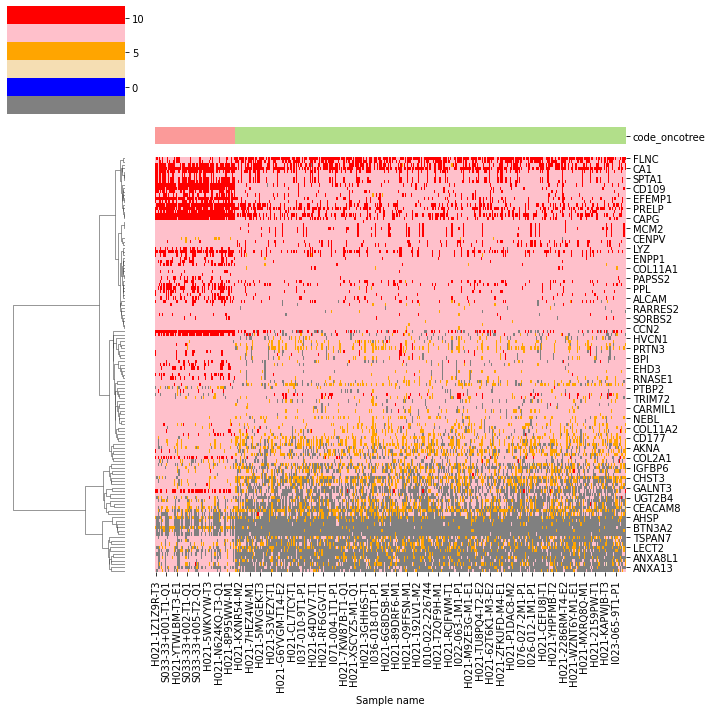

In [45]:
final_signatures = [x for x in input_df.columns if x in chdm_signatures]
final_signatures.append('code_oncotree')
input_df = input_df.set_index('Sample name')
input_df = input_df.loc[:,final_signatures]
input_df['code_oncotree'][input_df['code_oncotree'] =='CHDM'] = 'Chordoma'
input_df['code_oncotree'][input_df['code_oncotree'] !='CHDM'] = 'None-Chordoma'
# Clustermap of the triplicates 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from matplotlib import colors
plt.rcParams["figure.figsize"] = [20, 7]
plt.rcParams["figure.autolayout"] = True


from scipy.cluster.hierarchy import linkage
heat_Data = input_df.sort_values(by=['code_oncotree']).fillna(-4) 


lut = {"CHDM" : '#fb9a99',
       "others" : '#b2df8a'}


cmap = colors.ListedColormap(['grey','blue','wheat','orange','pink','red'])
bounds = [-4,0,8,9,10,11,12]
norm = colors.BoundaryNorm(bounds,cmap.N)

col_colors = heat_Data['code_oncotree'].map(lut)
heat_Data = heat_Data.drop(['code_oncotree'],axis=1)
link = linkage(heat_Data,method = 'ward',optimal_ordering=False)
sns.clustermap(heat_Data.T,col_linkage=link, method='ward',metric='euclidean',col_colors=col_colors,col_cluster=False, cmap=cmap)
plt.savefig(f'{report_dir}/CHDM_vs_all.svg', dpi=300)